There are two spectras that are relevant from this experiment.

The first one is of the thick Havar stopper foil of thickness 3.2 $\mu$m.

The energy calibration is calculated from EnergyCalibrationv04.ods. The equation of the energy calibration is $f(x)=0.00536x+1.44$

In the below cell we have done the energy calibration and the peak fitting.

[133.89943809   3.1289099    0.22407763] [[ 4.33596492e-02  1.00423866e-11 -4.83744911e-05]
 [ 1.00423866e-11  1.61908007e-07 -1.68177668e-14]
 [-4.83744911e-05 -1.68177668e-14  1.61908005e-07]]


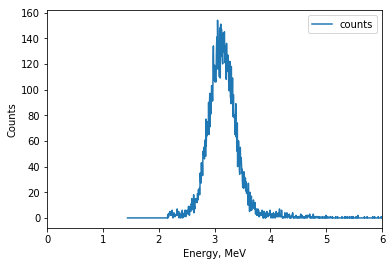

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

fp = 'Au_10B_foil.mpa'
spectrum = pd.read_csv(fp, sep=',', skiprows=221)


# Create the dictionary with old and new names
new_names = {'0': 'counts'}
# Rename the columns
spectrum = spectrum.rename(columns=new_names)

spectrum.shape


def energy(channelno):
    return 0.00536*channelno+1.44

spectrum["energy"]=energy(spectrum.index)

spectrum.head()

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, spectrum["energy"], spectrum["counts"], p0 = [1, 5, 0.4])


spectrum.plot("energy","counts")
ax = plt.gca()
ax.set_xlabel("Energy, MeV")
ax.set_ylabel("Counts")
ax.set(xlim=(0, 6))
# ax.legend().remove()
# plt.plot(spectrum["energy"], gauss_function(spectrum["energy"], *popt), label='fit')

print(popt, pcov)



Now we have to do the convolution procedure.

[ 0.04679068  0.04765196  0.04850265  0.04934173  0.05016808  0.05098052
  0.05349913  0.05445282  0.05540174  0.05806622  0.05917541  0.06028964
  0.06312941  0.06442398  0.07261918  0.08496346  0.09152658  0.09858216
  0.1113243   0.13030245  0.14061382  0.1637098   0.18190177  0.2032318
  0.23655678  0.28816926  0.33741869  0.39595453  0.46970558  0.55139197
  0.64155883  0.75626228  0.91141173  1.07968061  1.26185693  1.45013458
  1.65995052  1.87381053  2.10679562  2.38405379  2.64710089  2.9140448
  3.22200468  3.5067669   3.81628968  4.13449808  4.45392441  4.79554636
  5.1342064   5.48860513  5.85175357  6.21933903  6.5986228   6.98896471
  7.38446315  7.788928    8.20827272  8.626628    9.05062489  9.47899763
  9.91039341 10.34337805 10.778164   11.20990556 11.63852986 12.06235402
 12.47963192 12.88866731 13.28766653 13.67486129 14.0484926  14.40682383
 14.74815399 15.07083105 15.37326512 15.65394147 15.91143306 16.14441264
 16.35166403 16.53209272 16.68473547 16.80876882 16.9

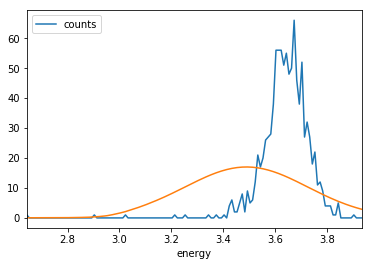

In [24]:
from scipy import signal

fp = 'Hist10BHavar3.2um.txt'
SrimHist10BHavar3p2um = pd.read_csv(fp, delim_whitespace=True, header=None)

SrimHist10BHavar3p2um.columns = ['energy','counts']

# print(SrimHist10BHavar3p2um.shape)

SrimHist10BHavar3p2um['energy']=SrimHist10BHavar3p2um['energy']/1e6

# # # SrimHist10BHavar3p2um.plot("energy","counts")

sig=SrimHist10BHavar3p2um['counts']

win=gauss_function(SrimHist10BHavar3p2um['energy'], 133.89943809,3.1289099,0.22407763)

filtered = signal.convolve(sig, win, mode='same') / sum(win)

# # print(win.shape)

print(filtered)

SrimHist10BHavar3p2um.plot("energy","counts")
plt.plot(SrimHist10BHavar3p2um['energy'],filtered)



The second one is for a thinner Havar stopping foil of thickness 3.2 $\mu$m.